In [0]:
#importing libraries
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [0]:
#Data Cleaning
def clean(line):
    trans = str.maketrans("","",string.punctuation)
    line = line.translate(trans)
    line = re.sub(r'[^a-zA-Z ]',"",line)
    line = re.sub(" +","",line)
    line = line.strip()
    return line.lower()

In [0]:
#Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
#Loss Function
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [0]:
#Logistic Regression Model
def logistic(X,Y,lr = 0.1, epochs = 1000):
    m,n = X.shape
    w = np.zeros(n)
    cost = []
    for i in range(epochs):
        z = np.dot(X, w)
        h = sigmoid(z)
        error = h - Y
        grad = np.dot(X.T, error) / m
        w = w - lr*(grad)
        cost.append(loss(h,Y))
    return w,cost

In [0]:
#Target Value Predictor
def predict(X,w):
    z = sigmoid(np.dot(X,w))
    return z.round()

In [7]:
#Loading Data
df = pd.read_csv("SpamHam/spam ham data set.csv",encoding='latin')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
def init(lr):
  df["v2"] = df["v2"].apply(lambda x: clean(x))
  enc = LabelEncoder()
  df["v1"] = enc.fit_transform(df["v1"])
  text = df["v2"]
  tf = TfidfVectorizer("english")
  mat = tf.fit_transform(text)
  X = mat.toarray()
  Y = df["v1"].values
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66, random_state=20)  
  epochs = 500
  theta, loss = logistic(X_train, Y_train,lr,epochs)
  y_pred = predict(X_test,theta)
  plt.plot(range(epochs), loss)
  print(accuracy_score(Y_test, y_pred))

0.88852637302882


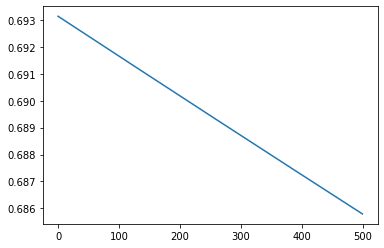

In [22]:
init(0.1)